In [15]:
install.packages("glmnet")
 library(glmnet)

data <- read.csv("taxi_trip_pricing.csv")
data <- na.omit(data)

X <- model.matrix(Trip_Price ~ ., data = data)[, -1]
y <- data$Trip_Price

model_lm <- lm(Trip_Price ~ ., data = data)
summary(model_lm)

ridge <- glmnet(X, y, alpha = 0)

lasso <- glmnet(X, y, alpha = 1)

print("Wyniki Ridge:")
print(coef(ridge))
print("Wyniki Lasso:")
print(coef(lasso))

cv_ridge <- cv.glmnet(X, y, alpha = 0)
cv_lasso <- cv.glmnet(X, y, alpha = 1)

best_lambda_ridge <- cv_ridge$lambda.min
best_lambda_lasso <- cv_lasso$lambda.min

print(paste("Najlepsze lambda dla Ridge:", best_lambda_ridge))
print(paste("Najlepsze lambda dla Lasso:", best_lambda_lasso))
final_ridge <- glmnet(X, y, alpha = 0, lambda = best_lambda_ridge)
final_lasso <- glmnet(X, y, alpha = 1, lambda = best_lambda_lasso)
print("Końcowe współczynniki Ridge:")
print(coef(final_ridge))
print("Końcowe współczynniki Lasso:")
print(coef(final_lasso))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
lm(formula = Trip_Price ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.929  -6.623  -1.096   5.239 119.966 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -60.83498    5.79793 -10.493   <2e-16 ***
Trip_Distance_km           1.75920    0.02626  66.980   <2e-16 ***
Time_of_DayAfternoon       3.37783    2.43146   1.389   0.1652    
Time_of_DayEvening         2.03559    2.56351   0.794   0.4274    
Time_of_DayMorning         4.54951    2.49449   1.824   0.0686 .  
Time_of_DayNight           1.76658    2.83849   0.622   0.5339    
Day_of_WeekWeekday         1.14720    2.66276   0.431   0.6667    
Day_of_WeekWeekend         1.63837    2.76524   0.592   0.5537    
Passenger_Count           -0.18463    0.49120  -0.376   0.7071    
Traffic_ConditionsHigh     0.37005    2.64846   0.140   0.8889    
Traffic_ConditionsLow     -2.93019    2.47360  -1.185   0.2366    
Traffic_ConditionsMedium  -2.68326    

[1] "Wyniki Ridge:"
19 x 100 sparse Matrix of class "dgCMatrix"


  [[ suppressing 100 column names ‘s0’, ‘s1’, ‘s2’ ... ]]



                                                                  
(Intercept)               5.709464e+01  5.694278e+01  5.692800e+01
Trip_Distance_km          1.761229e-36  2.226941e-03  2.443756e-03
Time_of_DayAfternoon      7.671902e-37  9.711530e-04  1.065822e-03
Time_of_DayEvening       -4.018366e-37 -5.098157e-04 -5.596352e-04
Time_of_DayMorning       -4.021628e-37 -5.043010e-04 -5.529509e-04
Time_of_DayNight          2.085703e-36  2.631794e-03  2.887448e-03
Day_of_WeekWeekday        3.991509e-36  5.036268e-03  5.525459e-03
Day_of_WeekWeekend       -3.373316e-36 -4.253603e-03 -4.666487e-03
Passenger_Count           3.532107e-39  4.067265e-06  4.420627e-06
Traffic_ConditionsHigh    1.211649e-35  1.530089e-02  1.678851e-02
Traffic_ConditionsLow    -1.615309e-36 -2.042009e-03 -2.240773e-03
Traffic_ConditionsMedium -5.268363e-36 -6.649718e-03 -7.295885e-03
WeatherClear             -1.214447e-36 -1.533001e-03 -1.681980e-03
WeatherRain               1.044134e-36  1.315902e-03  1.443557

  [[ suppressing 78 column names ‘s0’, ‘s1’, ‘s2’ ... ]]



                                                                             
(Intercept)              57.09464 52.8596699 49.0009226 45.4849758 42.2813760
Trip_Distance_km          .        0.1548981  0.2960355  0.4246347  0.5418094
Time_of_DayAfternoon      .        .          .          .          .        
Time_of_DayEvening        .        .          .          .          .        
Time_of_DayMorning        .        .          .          .          .        
Time_of_DayNight          .        .          .          .          .        
Day_of_WeekWeekday        .        .          .          .          .        
Day_of_WeekWeekend        .        .          .          .          .        
Passenger_Count           .        .          .          .          .        
Traffic_ConditionsHigh    .        .          .          .          .        
Traffic_ConditionsLow     .        .          .          .          .        
Traffic_ConditionsMedium  .        .          .          .      

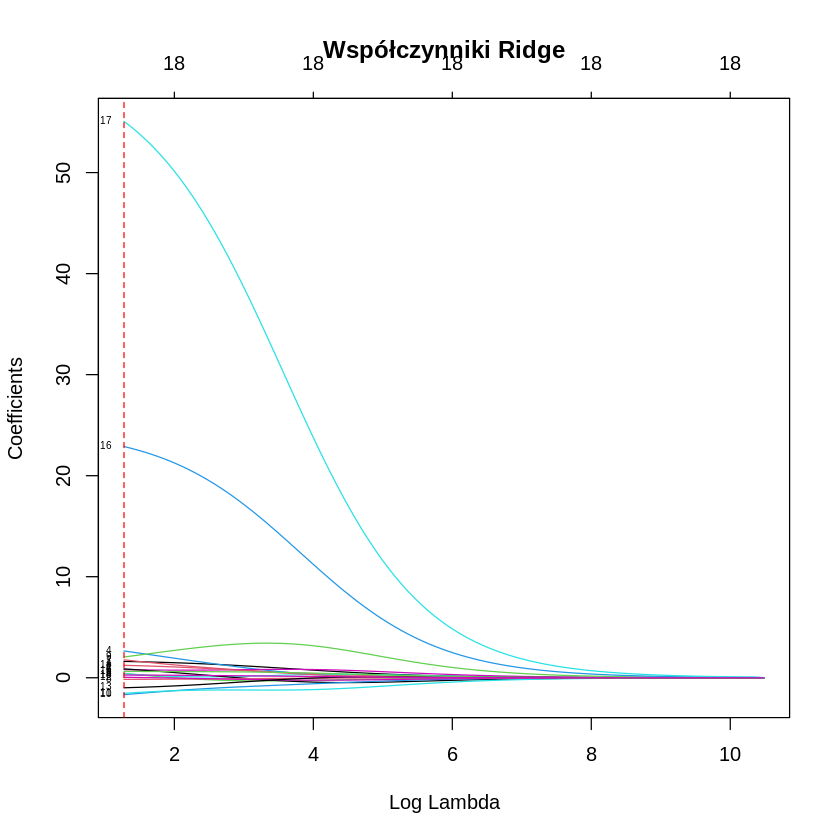

In [16]:
plot(ridge, xvar = "lambda", label = TRUE, main = "Współczynniki Ridge")
abline(v = log(best_lambda_ridge), col = "red", lty = 2)

In [17]:
summary(model_lm)


Call:
lm(formula = Trip_Price ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.929  -6.623  -1.096   5.239 119.966 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -60.83498    5.79793 -10.493   <2e-16 ***
Trip_Distance_km           1.75920    0.02626  66.980   <2e-16 ***
Time_of_DayAfternoon       3.37783    2.43146   1.389   0.1652    
Time_of_DayEvening         2.03559    2.56351   0.794   0.4274    
Time_of_DayMorning         4.54951    2.49449   1.824   0.0686 .  
Time_of_DayNight           1.76658    2.83849   0.622   0.5339    
Day_of_WeekWeekday         1.14720    2.66276   0.431   0.6667    
Day_of_WeekWeekend         1.63837    2.76524   0.592   0.5537    
Passenger_Count           -0.18463    0.49120  -0.376   0.7071    
Traffic_ConditionsHigh     0.37005    2.64846   0.140   0.8889    
Traffic_ConditionsLow     -2.93019    2.47360  -1.185   0.2366    
Traffic_ConditionsMedium  -2.68326    

In [18]:
ridge_coefficients <- coef(ridge, s = best_lambda_ridge)
print(ridge_coefficients)

19 x 1 sparse Matrix of class "dgCMatrix"
                                  s1
(Intercept)              -50.7772159
Trip_Distance_km           1.6163159
Time_of_DayAfternoon       1.7704685
Time_of_DayEvening         0.4350915
Time_of_DayMorning         2.6508663
Time_of_DayNight           0.3955546
Day_of_WeekWeekday         0.7997191
Day_of_WeekWeekend         0.8790239
Passenger_Count           -0.1591972
Traffic_ConditionsHigh     2.0539967
Traffic_ConditionsLow     -1.6741156
Traffic_ConditionsMedium  -1.5409205
WeatherClear               0.0463547
WeatherRain               -0.9913339
WeatherSnow                1.2303795
Base_Fare                  0.6246018
Per_Km_Rate               22.8859342
Per_Minute_Rate           55.0736474
Trip_Duration_Minutes      0.2670376


In [19]:
lasso_coefficients <- coef(lasso, s = best_lambda_lasso)
print(lasso_coefficients)

19 x 1 sparse Matrix of class "dgCMatrix"
                                   s1
(Intercept)              -57.08819622
Trip_Distance_km           1.74731102
Time_of_DayAfternoon       0.95244971
Time_of_DayEvening         .         
Time_of_DayMorning         1.88310600
Time_of_DayNight           .         
Day_of_WeekWeekday         .         
Day_of_WeekWeekend         .         
Passenger_Count            .         
Traffic_ConditionsHigh     2.23699014
Traffic_ConditionsLow     -0.38835622
Traffic_ConditionsMedium  -0.01427068
WeatherClear               .         
WeatherRain               -0.97711582
WeatherSnow                0.42502059
Base_Fare                  0.33871366
Per_Km_Rate               24.20517054
Per_Minute_Rate           58.37049839
Trip_Duration_Minutes      0.28575149



	Shapiro-Wilk normality test

data:  lm_residuals
W = 0.81305, p-value < 2.2e-16



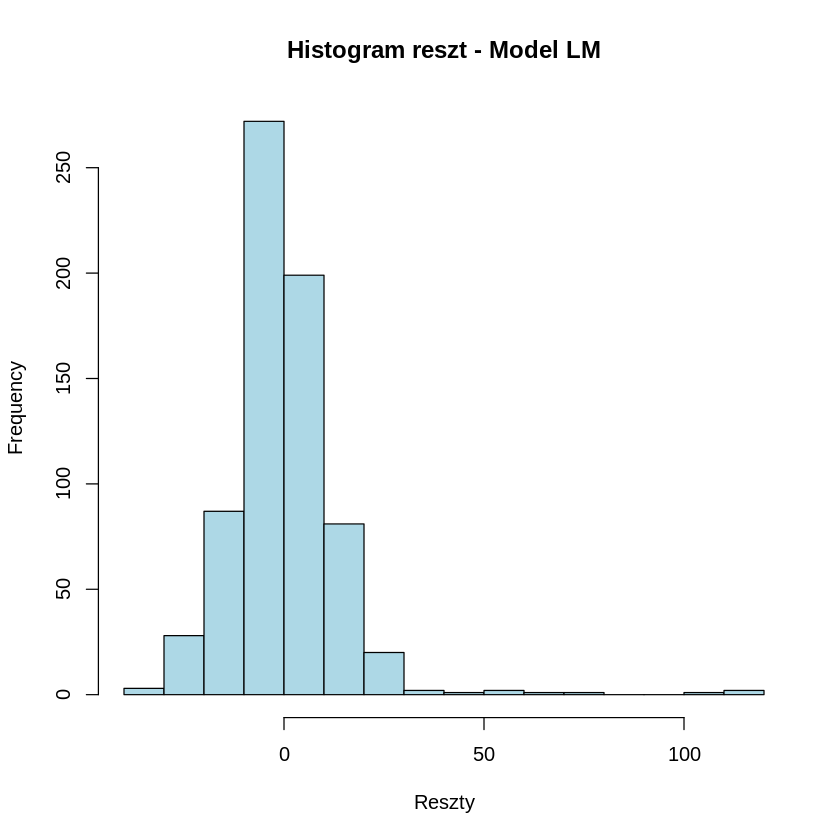

In [20]:
lm_residuals <- residuals(model_lm)

hist(lm_residuals, breaks = 20, main = "Histogram reszt - Model LM", xlab = "Reszty", col = "lightblue")

shapiro_lm <- shapiro.test(lm_residuals)
print(shapiro_lm)


	Shapiro-Wilk normality test

data:  ridge_residuals
W = 0.71887, p-value < 2.2e-16



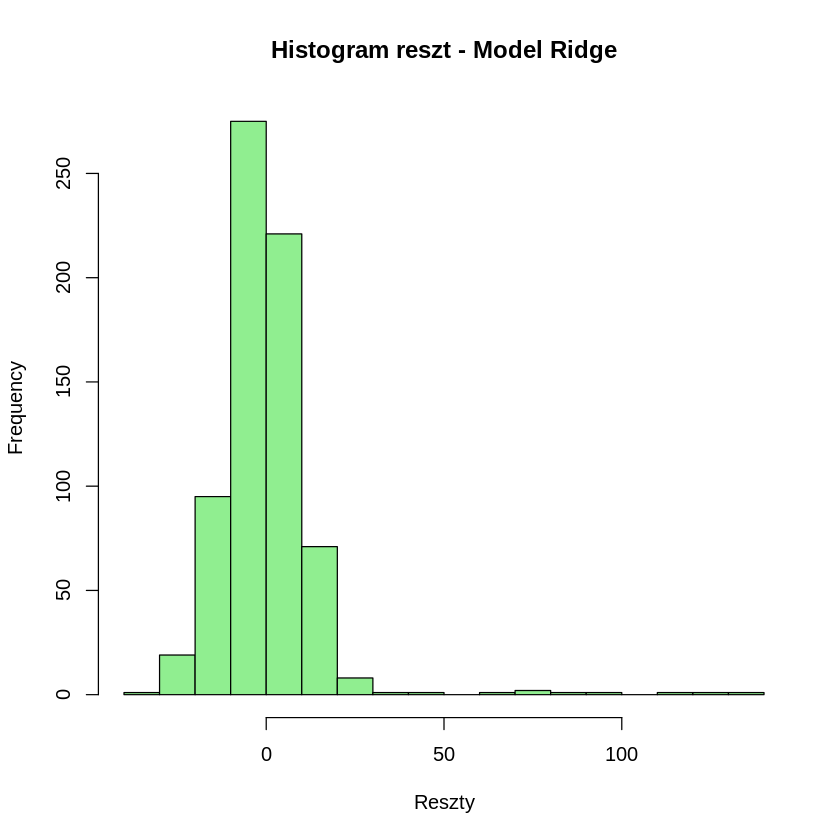

In [21]:
ridge_predictions <- predict(ridge, s = best_lambda_ridge, newx = X)

ridge_residuals <- y - ridge_predictions

hist(ridge_residuals, breaks = 20, main = "Histogram reszt - Model Ridge", xlab = "Reszty", col = "lightgreen")

shapiro_ridge <- shapiro.test(ridge_residuals)
print(shapiro_ridge)


	Shapiro-Wilk normality test

data:  lasso_residuals
W = 0.80423, p-value < 2.2e-16



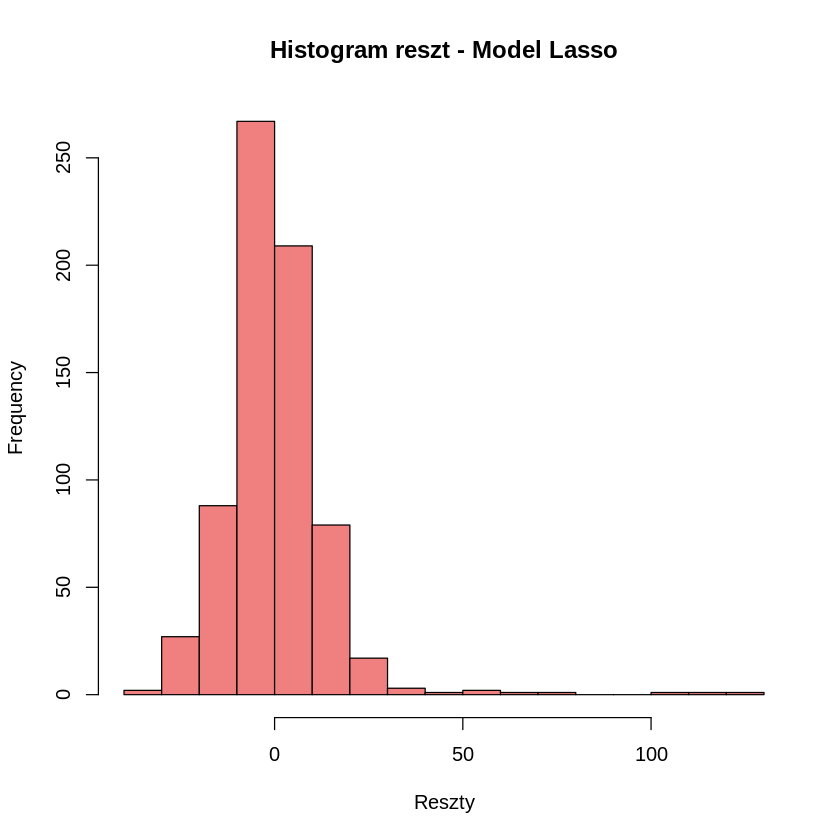

In [22]:
lasso_predictions <- predict(lasso, s = best_lambda_lasso, newx = X)

lasso_residuals <- y - lasso_predictions

hist(lasso_residuals, breaks = 20, main = "Histogram reszt - Model Lasso", xlab = "Reszty", col = "lightcoral")

shapiro_lasso <- shapiro.test(lasso_residuals)
print(shapiro_lasso)


In [23]:
install.packages("lmtest")
library(lmtest)
dwtest_lm <- dwtest(model_lm)
print(dwtest_lm)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Durbin-Watson test

data:  model_lm
DW = 2.03, p-value = 0.653
alternative hypothesis: true autocorrelation is greater than 0



In [24]:
ridge_predictions <- predict(ridge, s = best_lambda_ridge, newx = X)

ridge_residuals <- y - ridge_predictions
dwtest_ridge <- dwtest(ridge_residuals ~ 1)
print(dwtest_ridge)


	Durbin-Watson test

data:  ridge_residuals ~ 1
DW = 1.9887, p-value = 0.4406
alternative hypothesis: true autocorrelation is greater than 0



In [25]:
lasso_predictions <- predict(lasso, s = best_lambda_lasso, newx = X)
lasso_residuals <- y - lasso_predictions

dwtest_lasso <- dwtest(lasso_residuals ~ 1)
print(dwtest_lasso)


	Durbin-Watson test

data:  lasso_residuals ~ 1
DW = 2.0181, p-value = 0.5948
alternative hypothesis: true autocorrelation is greater than 0



In [52]:
install.packages("keras3")
library(keras3)
data <- read.csv("taxi_trip_pricing.csv", stringsAsFactors = FALSE)

str(data)

data <- na.omit(data)

normalize <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

numeric_columns <- c("Trip_Distance_km", "Passenger_Count", "Base_Fare",
                     "Per_Km_Rate", "Per_Minute_Rate", "Trip_Duration_Minutes", "Trip_Price")

data[numeric_columns] <- lapply(data[numeric_columns], normalize)

categorical_columns <- c("Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather")
data_encoded <- model.matrix(~ . - 1, data = data[categorical_columns])

data_prepared <- cbind(data_encoded, data[numeric_columns])

X <- as.matrix(data_prepared[, -which(colnames(data_prepared) == "Trip_Price")])
y <- as.numeric(data_prepared$Trip_Price)


set.seed(123)
train_index <- sample(1:nrow(X), size = 0.8 * nrow(X))
X_train <- X[train_index, ]
y_train <- y[train_index]
X_test <- X[-train_index, ]
y_test <- y[-train_index]

model <- keras_model_sequential()
model %>%
  layer_dense(units = 128, activation = "relu", input_shape = ncol(X)) %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 64, activation = "relu") %>%
  layer_dropout(rate = 0.2) %>%
  layer_dense(units = 32, activation = "relu") %>%
  layer_dense(units = 1)

model %>% compile(
  optimizer = optimizer_adam(),
  loss = "mse",
  metrics = "mae"
)

history <- model %>% fit(
  X_train, y_train,
  validation_split = 0.2,
  epochs = 100,
  batch_size = 32,
  verbose = 1
)

score <- model %>% evaluate(X_test, y_test)
cat("Mean Absolute Error (MAE):", score$mae, "\n")

y_pred <- model %>% predict(X_test)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	1000 obs. of  11 variables:
 $ Trip_Distance_km     : num  19.4 47.6 36.9 30.3 NA ...
 $ Time_of_Day          : chr  "Morning" "Afternoon" "Evening" "Evening" ...
 $ Day_of_Week          : chr  "Weekday" "Weekday" "Weekend" "Weekday" ...
 $ Passenger_Count      : num  3 1 1 4 3 2 4 3 3 2 ...
 $ Traffic_Conditions   : chr  "Low" "High" "High" "Low" ...
 $ Weather              : chr  "Clear" "Clear" "Clear" "" ...
 $ Base_Fare            : num  3.56 NA 2.7 3.48 2.93 2.55 3.51 2.97 2.77 3.39 ...
 $ Per_Km_Rate          : num  0.8 0.62 1.21 0.51 0.63 1.71 1.66 1.87 1.78 1.52 ...
 $ Per_Minute_Rate      : num  0.32 0.43 0.15 0.15 0.32 0.48 NA 0.23 0.34 0.47 ...
 $ Trip_Duration_Minutes: num  53.8 40.6 37.3 116.8 22.6 ...
 $ Trip_Price           : num  36.3 NA 52.9 36.5 15.6 ...
Mean Absolute Error (MAE): 0.02983084 
